# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import folium.plugins as plugins
from ipyleaflet.velocity import Velocity
import ipyleaflet
from ipywidgets import Layout
import ipywidgets as widgets


# Data Importing and Preperation

In [2]:
data = pd.read_csv('data/fullWithLocations_FINAL_large.csv')
data.sample(5)

,Unnamed: 0,LAT,LON,YEAR,DOY,EVLAND,GWETPROF,GWETROOT,GWETTOP,PRECSNO,...,WS2M_MIN,WS50M,WS50M_MAX,WS50M_MIN,Z0M,GOV,City,Date,Week,Month
170969,85484,26.0,32.500,2020,255,0.00,0.36,0.35,0.06,0.00,...,1.73,6.46,8.60,3.83,0.03,Al Wadi al Jadid,Al-Wahat al-Kharijah,2020-09-11,37,9
309865,8956,28.5,32.500,2022,27,0.24,0.34,0.34,0.32,0.07,...,1.83,6.98,8.52,5.93,0.01,Al Bahr al Ahmar,Ras Gharib,2022-01-27,4,1
301136,120995,23.0,26.875,2021,361,0.00,0.20,0.20,0.05,0.00,...,0.98,4.29,6.82,1.87,0.01,Al Wadi al Jadid,Shurtah al-Dakhlah,2021-12-27,52,12
51637,62872,23.0,30.000,2019,188,0.00,0.20,0.20,0.04,0.00,...,1.64,6.84,8.84,5.36,0.01,Al Wadi al Jadid,Baris Shurtah,2019-07-07,27,7
107825,8612,28.5,27.500,2020,26,0.22,0.30,0.30,0.30,0.00,...,1.34,4.62,6.27,2.42,0.01,Matrouh,Siwa,2020-01-26,4,1


In [3]:
df = data[['LAT', 'LON', 'YEAR', "Month","Week",'DOY', 'WD2M', 'WD50M', 'WS2M', 'WS2M_MAX', 'WS2M_MIN', 'WS50M', 'WS50M_MAX', 'WS50M_MIN']]
df.sample(5)

,LAT,LON,YEAR,Month,Week,DOY,WD2M,WD50M,WS2M,WS2M_MAX,WS2M_MIN,WS50M,WS50M_MAX,WS50M_MIN
59074,22.5,31.875,2019,8,31,215,10.6,10.8,3.35,4.85,2.01,5.97,9.26,2.49
383886,30.5,26.875,2022,10,42,295,1.8,3.0,3.63,5.33,2.21,6.98,8.61,5.69
264079,29.5,31.875,2021,8,32,226,11.9,13.6,3.44,5.17,1.31,6.01,8.48,4.06
204027,24.0,33.125,2021,1,1,9,353.2,351.9,2.28,4.16,1.13,5.28,8.01,2.39
425957,25.0,28.750,2023,3,12,83,297.0,293.5,4.53,7.16,1.65,7.91,11.47,5.35


# Data Analysis with pandas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503976 entries, 0 to 503975
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   LAT        503976 non-null  float64
 1   LON        503976 non-null  float64
 2   YEAR       503976 non-null  int64  
 3   Month      503976 non-null  int64  
 4   Week       503976 non-null  int64  
 5   DOY        503976 non-null  int64  
 6   WD2M       503976 non-null  float64
 7   WD50M      503976 non-null  float64
 8   WS2M       503976 non-null  float64
 9   WS2M_MAX   503976 non-null  float64
 10  WS2M_MIN   503976 non-null  float64
 11  WS50M      503976 non-null  float64
 12  WS50M_MAX  503976 non-null  float64
 13  WS50M_MIN  503976 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 53.8 MB


In [5]:
df.describe()

,LAT,LON,YEAR,Month,Week,DOY,WD2M,WD50M,WS2M,WS2M_MAX,WS2M_MIN,WS50M,WS50M_MAX,WS50M_MIN
count,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000
mean,26.692029,29.938859,2020.999452,6.523549,26.615553,183.100219,217.817401,210.996520,3.198564,4.991968,1.632560,6.138681,8.472295,3.706217
std,2.694820,2.821385,1.414021,3.448537,15.060974,105.424248,141.721805,144.831581,1.085977,1.403819,0.871049,1.706020,1.770092,1.997519
min,22.500000,25.000000,2019.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.490000,0.860000,0.000000,0.760000,1.370000,0.000000
25%,24.500000,27.500000,2020.000000,4.000000,14.000000,92.000000,40.800000,33.700000,2.400000,4.030000,1.070000,4.960000,7.400000,2.130000
50%,26.500000,30.000000,2021.000000,7.000000,27.000000,183.000000,302.500000,298.000000,3.120000,4.960000,1.490000,6.140000,8.540000,3.690000
75%,29.000000,32.500000,2022.000000,10.000000,40.000000,274.000000,339.700000,340.100000,3.890000,5.880000,2.080000,7.310000,9.560000,5.150000
max,31.500000,36.250000,2023.000000,12.000000,53.000000,366.000000,360.000000,360.000000,10.600000,15.480000,9.090000,16.570000,23.520000,13.270000


# Analysis with ipyleaflet

In [6]:
# Define map boundaries
min_lon, max_lon = 24.5, 37
min_lat, max_lat = 22, 32

# Create Map
m = ipyleaflet.Map(
    center=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2],  # Centered within bounds
    zoom=6,
    layout=Layout(width="600px", height="600px"),  # Set fixed size
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik,
    max_bounds=[[min_lat, min_lon], [max_lat, max_lon]],  # Restrict panning
    max_bounds_visible=True  # Prevents moving outside max/min bounds
)

# Ensure df is a full copy to avoid warnings
df = df.copy()
df.loc[:, "ZWC2M"] = df["WS2M"] * np.cos(df["WD2M"])
df.loc[:, "MWC2M"] = df["WS2M"] * np.sin(df["WD2M"])

# Initialize global wind variable
wind = None  

# Function to update wind velocity layer
def update_wind(change):
    global wind  
    year = year_slider.value
    doy = day_slider.value  
    
    # Extract data for selected year & day
    wind_data = df[(df["YEAR"] == year) & (df["DOY"] == doy)].copy()  
    
    if wind_data.empty:
        return  
    
    wind_layer = Velocity(
        data=wind_data[["LAT", "LON", "ZWC2M", "MWC2M"]].set_index(["LAT", "LON"]).to_xarray(),
        zonal_speed="ZWC2M",
        meridional_speed="MWC2M",
        latitude_dimension="LAT",
        longitude_dimension="LON",
        velocity_scale=0.05,
        max_velocity=10
    )
    
    if wind is not None:
        m.remove(wind)
    m.add(wind_layer)
    
    wind = wind_layer  

# Create Year Slider (2019–2023)
year_slider = widgets.IntSlider(
    value=2019, min=2019, max=2023, step=1, description="Year"
)
year_slider.observe(update_wind, names="value")

# Create Day Slider (DOY: 1–365)
day_slider = widgets.IntSlider(
    value=1, min=1, max=365, step=1, description="Day"
)
day_slider.observe(update_wind, names="value")

# Display map and sliders
ui = widgets.VBox([year_slider, day_slider])
display(m, ui)

# Initialize the first wind layer
update_wind({"new": 1})


Map(center=[27.0, 30.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [7]:
# Define map boundaries
min_lon, max_lon = 24.5, 37
min_lat, max_lat = 22, 32

# Create Map
m = ipyleaflet.Map(
    center=[(min_lat + max_lat) / 2, (min_lon + max_lon) / 2],  # Centered within bounds
    zoom=6,
    layout=Layout(width="600px", height="600px"),  # Set fixed size
    basemap=ipyleaflet.basemaps.OpenStreetMap.Mapnik,
    max_bounds=[[min_lat, min_lon], [max_lat, max_lon]],  # Restrict panning
    max_bounds_visible=True  # Prevents moving outside max/min bounds
)

# Ensure df is a full copy to avoid warnings
df = df.copy()
df.loc[:, "ZWC50M"] = df["WS50M"] * np.cos(df["WD50M"])
df.loc[:, "MWC50M"] = df["WS50M"] * np.sin(df["WD50M"])

# Initialize global wind variable
wind = None  

# Function to update wind velocity layer
def update_wind(change):
    global wind  
    year = year_slider.value
    doy = day_slider.value  
    
    # Extract data for selected year & day
    wind_data = df[(df["YEAR"] == year) & (df["DOY"] == doy)].copy()  
    
    if wind_data.empty:
        return  
    
    wind_layer = Velocity(
        data=df[['LAT', 'LON', 'ZWC50M', 'MWC50M']][(df['YEAR'] == 2019) & (df['DOY'] == 1)].set_index(['LAT', 'LON']).to_xarray(),
        zonal_speed='ZWC50M',
        meridional_speed='MWC50M',
        latitude_dimension='LAT',
        longitude_dimension='LON',
        velocity_scale=0.05,
        max_velocity=20
    )
    
    if wind is not None:
        m.remove(wind)
    m.add(wind_layer)
    
    wind = wind_layer  

# Create Year Slider (2019–2023)
year_slider = widgets.IntSlider(
    value=2019, min=2019, max=2023, step=1, description="Year"
)
year_slider.observe(update_wind, names="value")

# Create Day Slider (DOY: 1–365)
day_slider = widgets.IntSlider(
    value=1, min=1, max=365, step=1, description="Day"
)
day_slider.observe(update_wind, names="value")

# Display map and sliders
ui = widgets.VBox([year_slider, day_slider])
display(m, ui)

# Initialize the first wind layer
update_wind({"new": 1})


Map(center=[27.0, 30.75], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

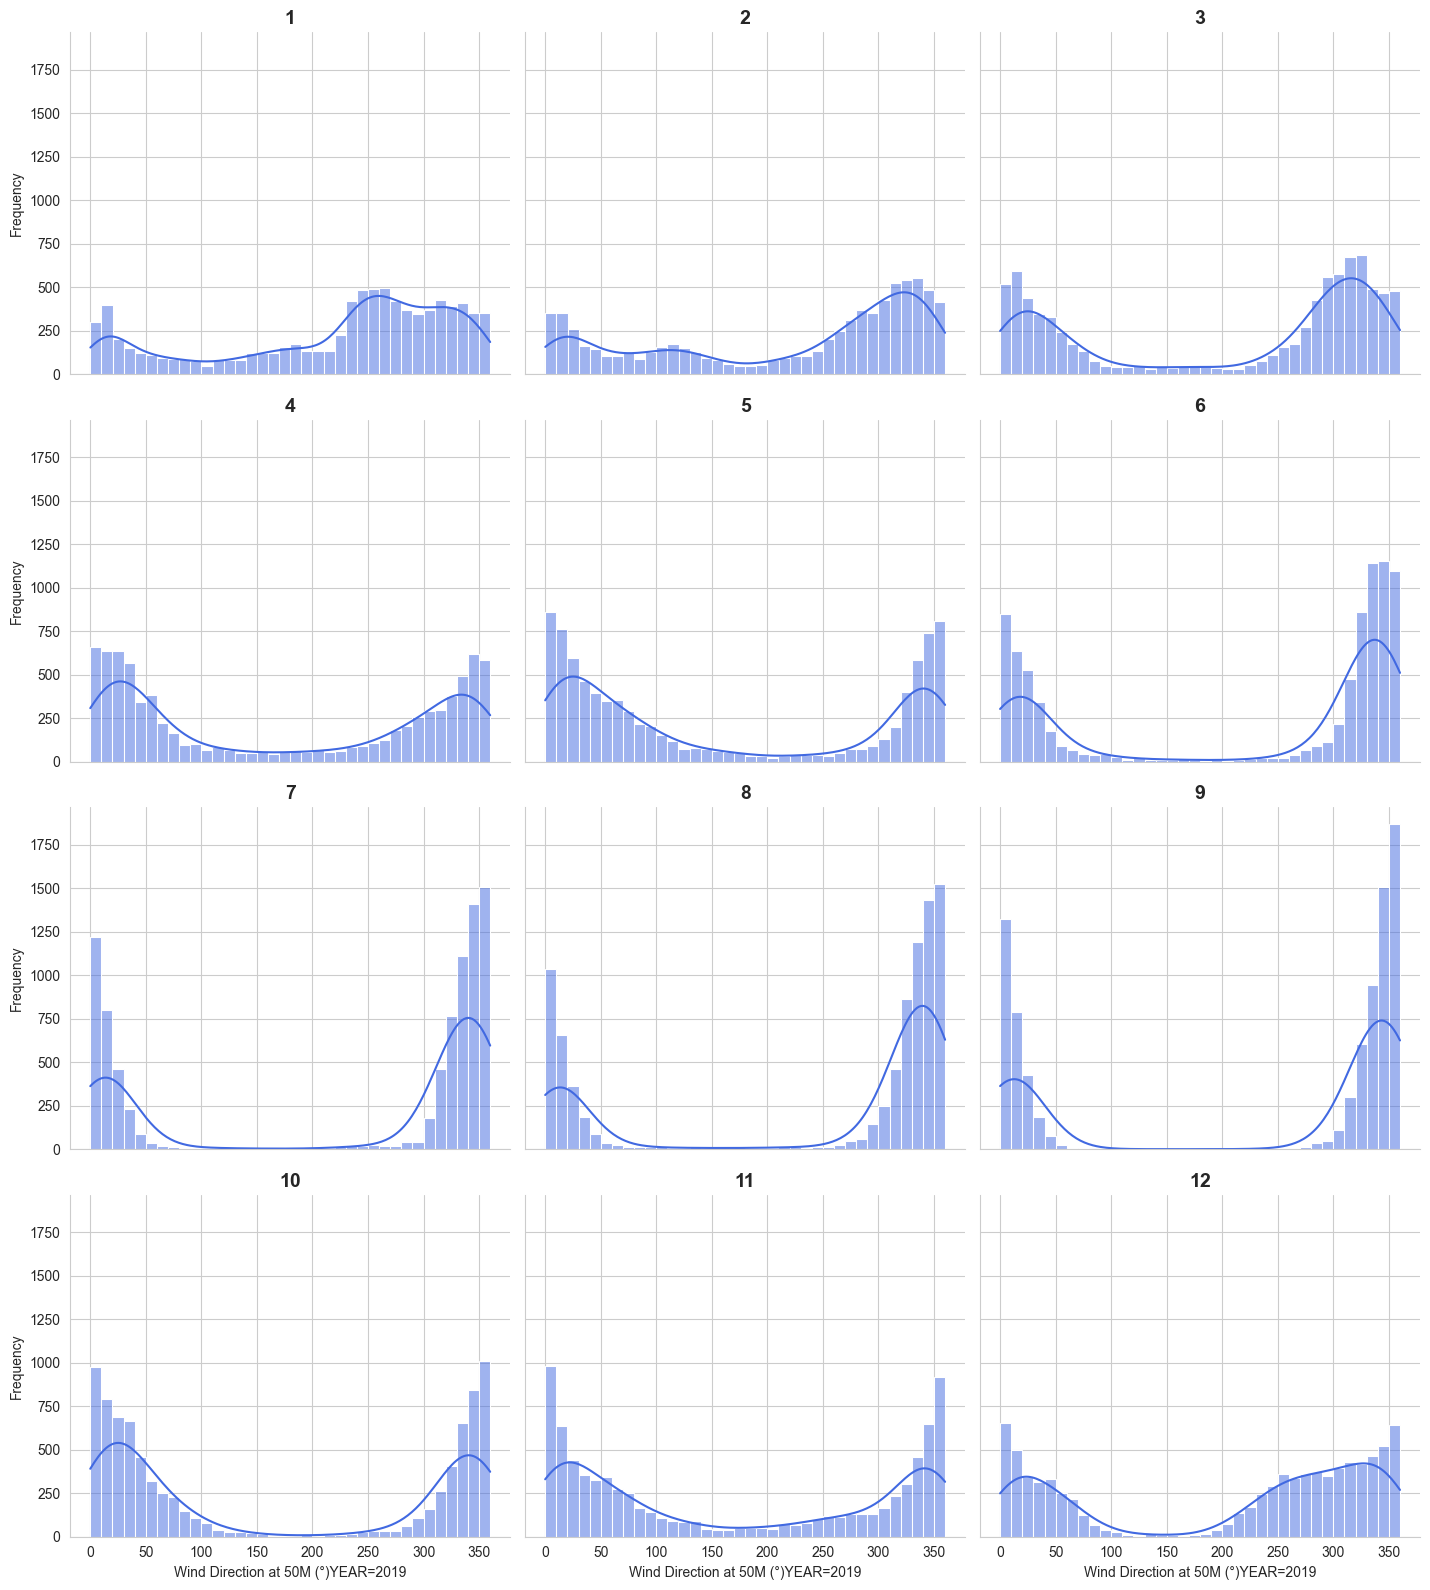

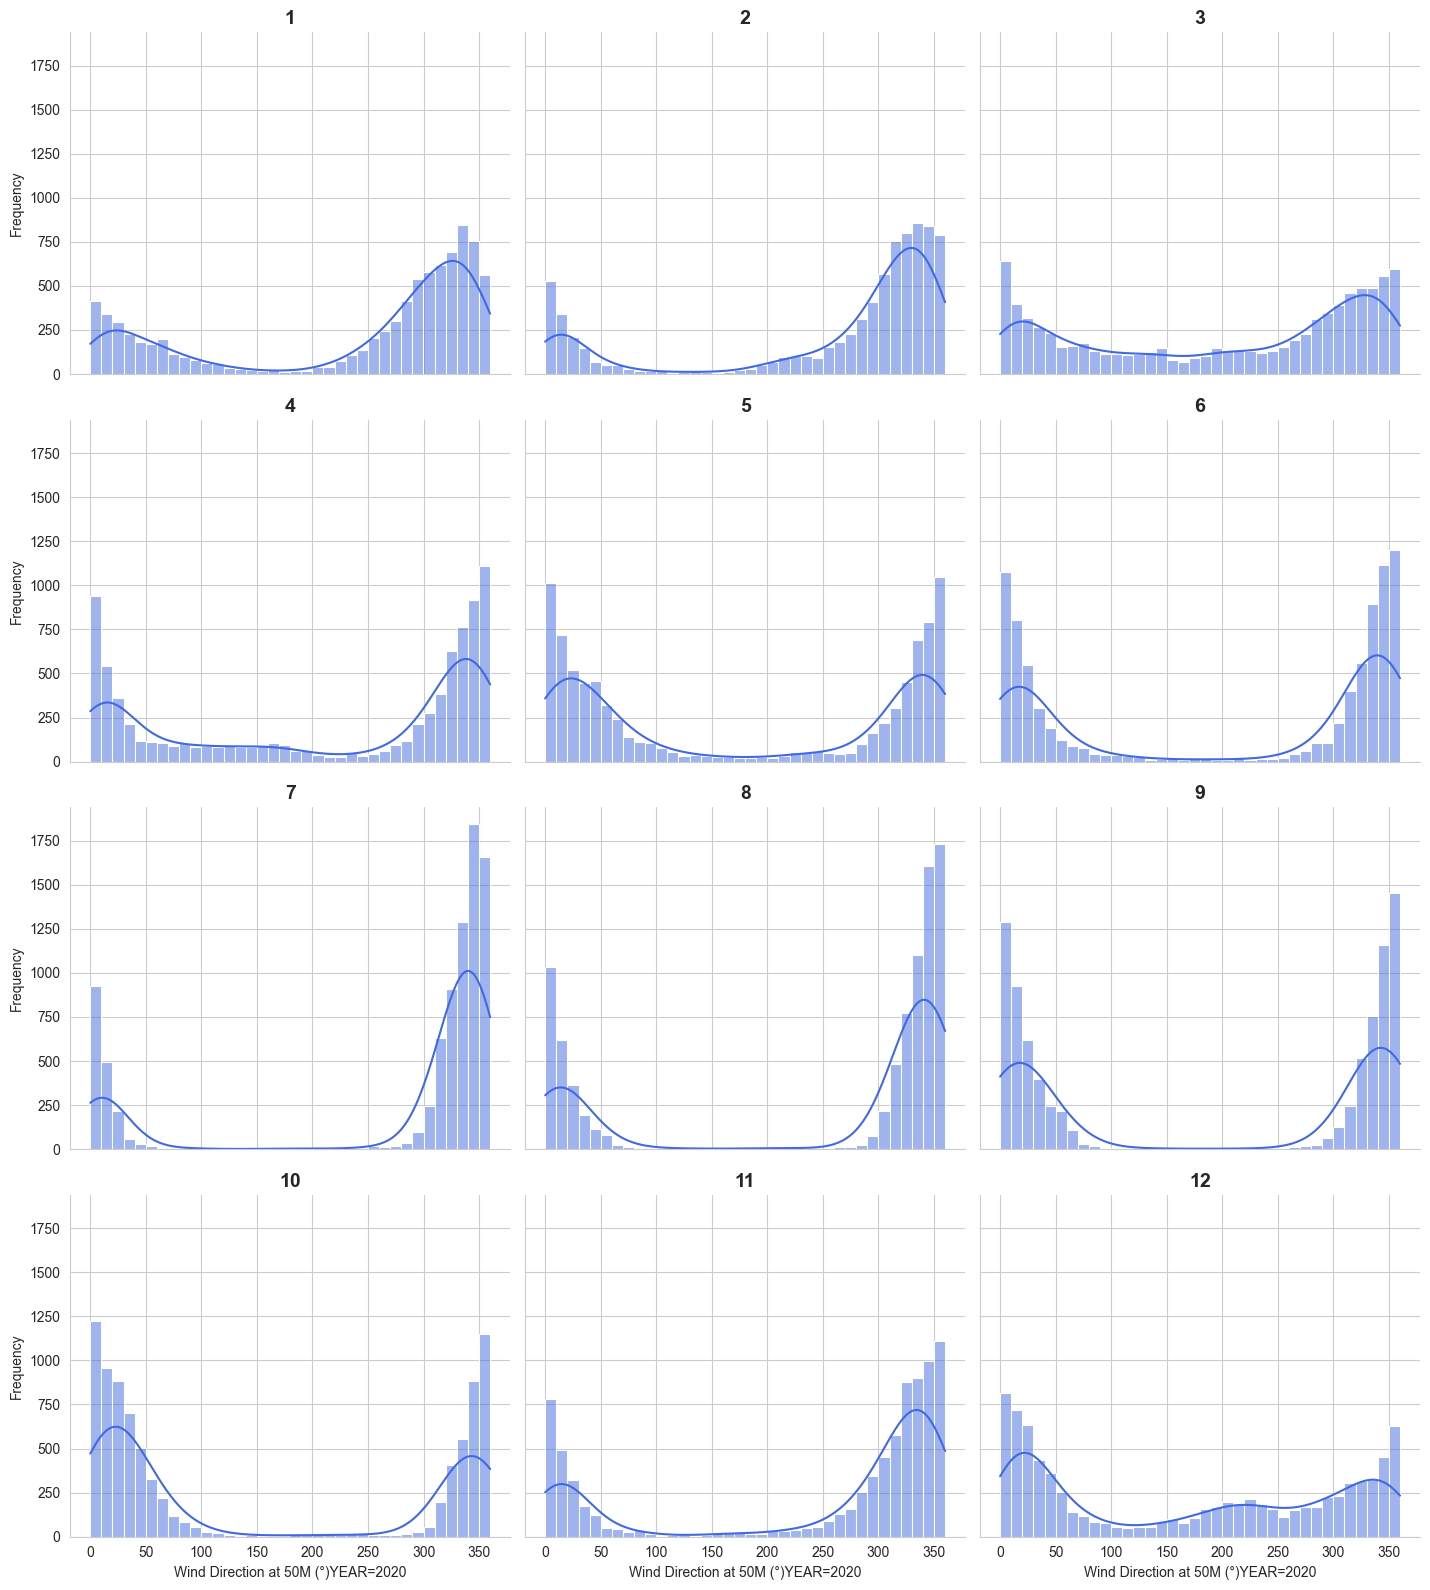

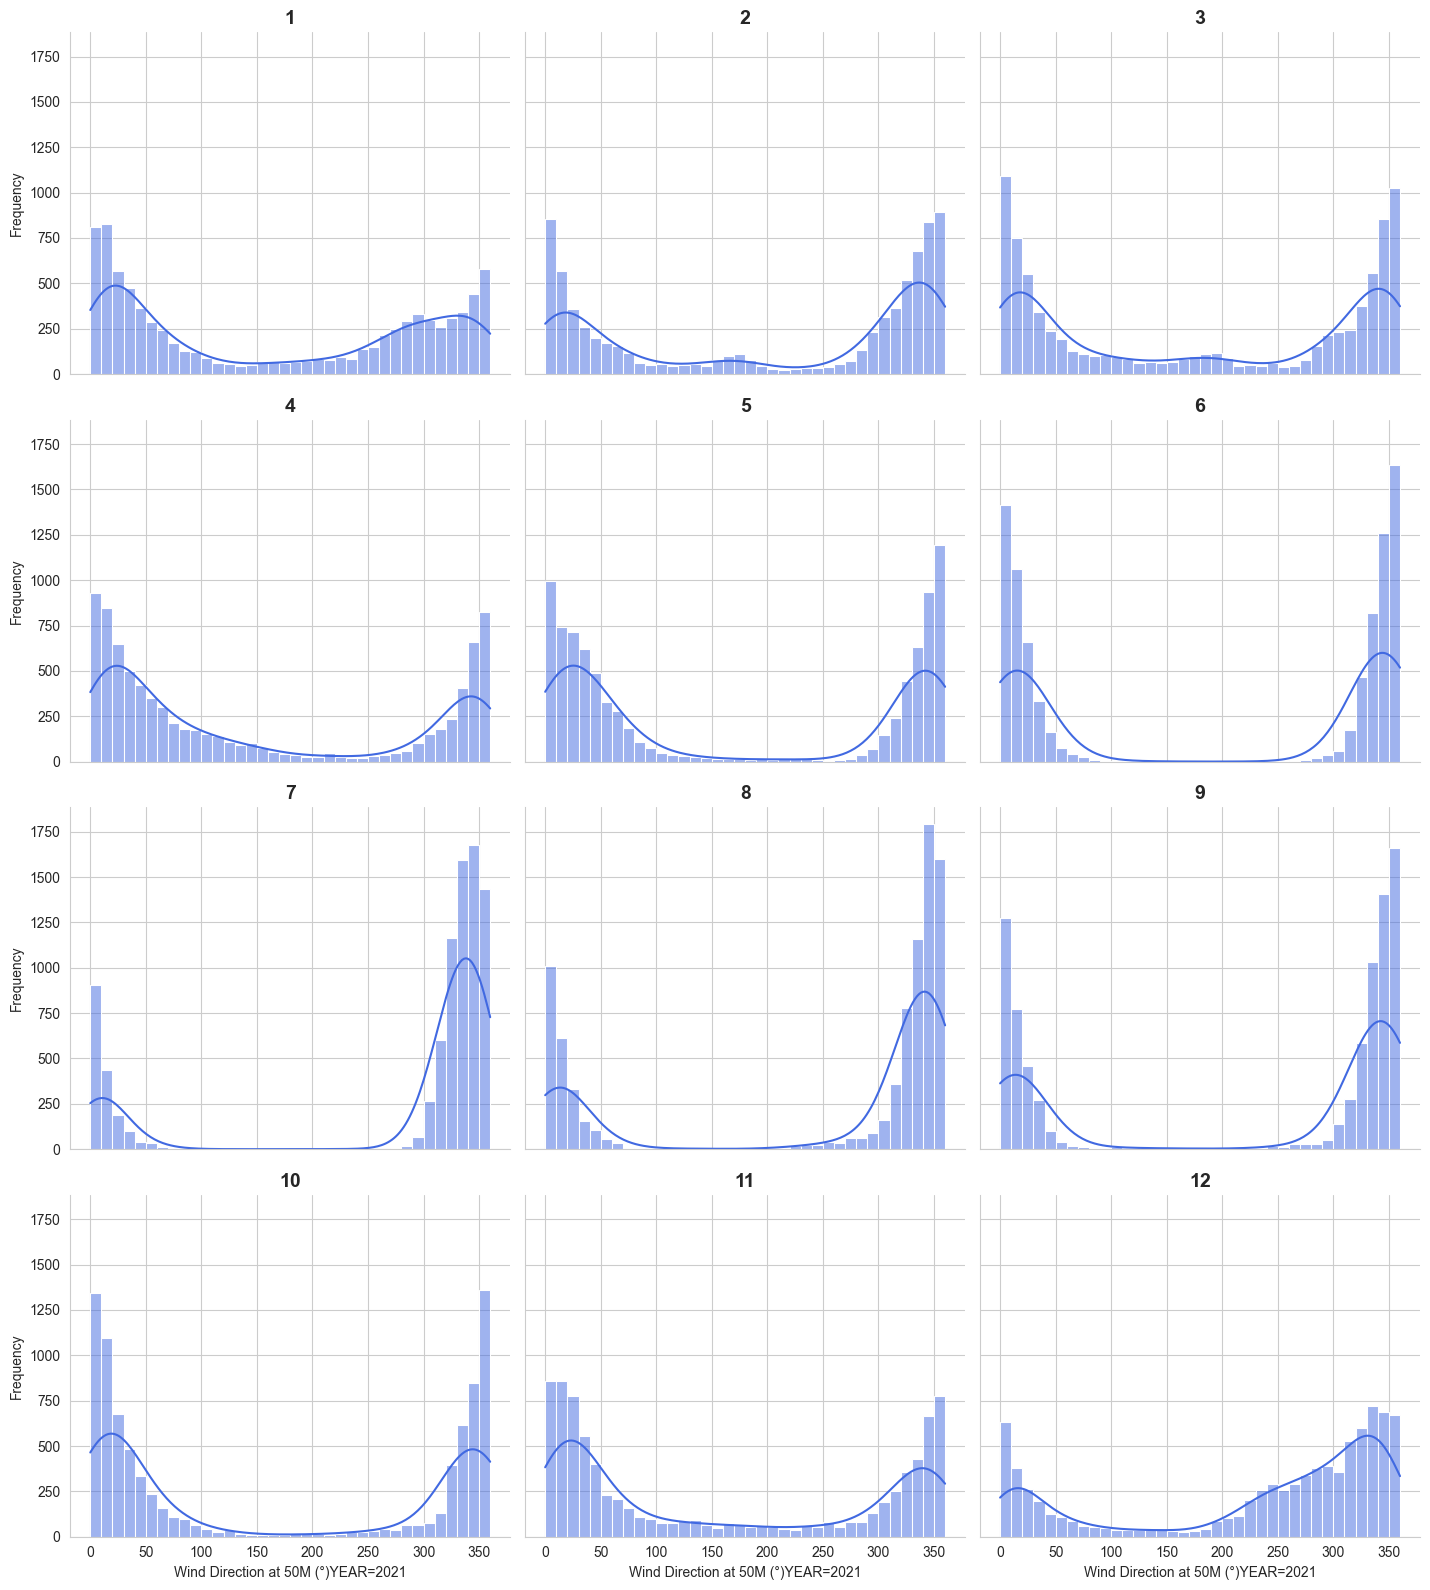

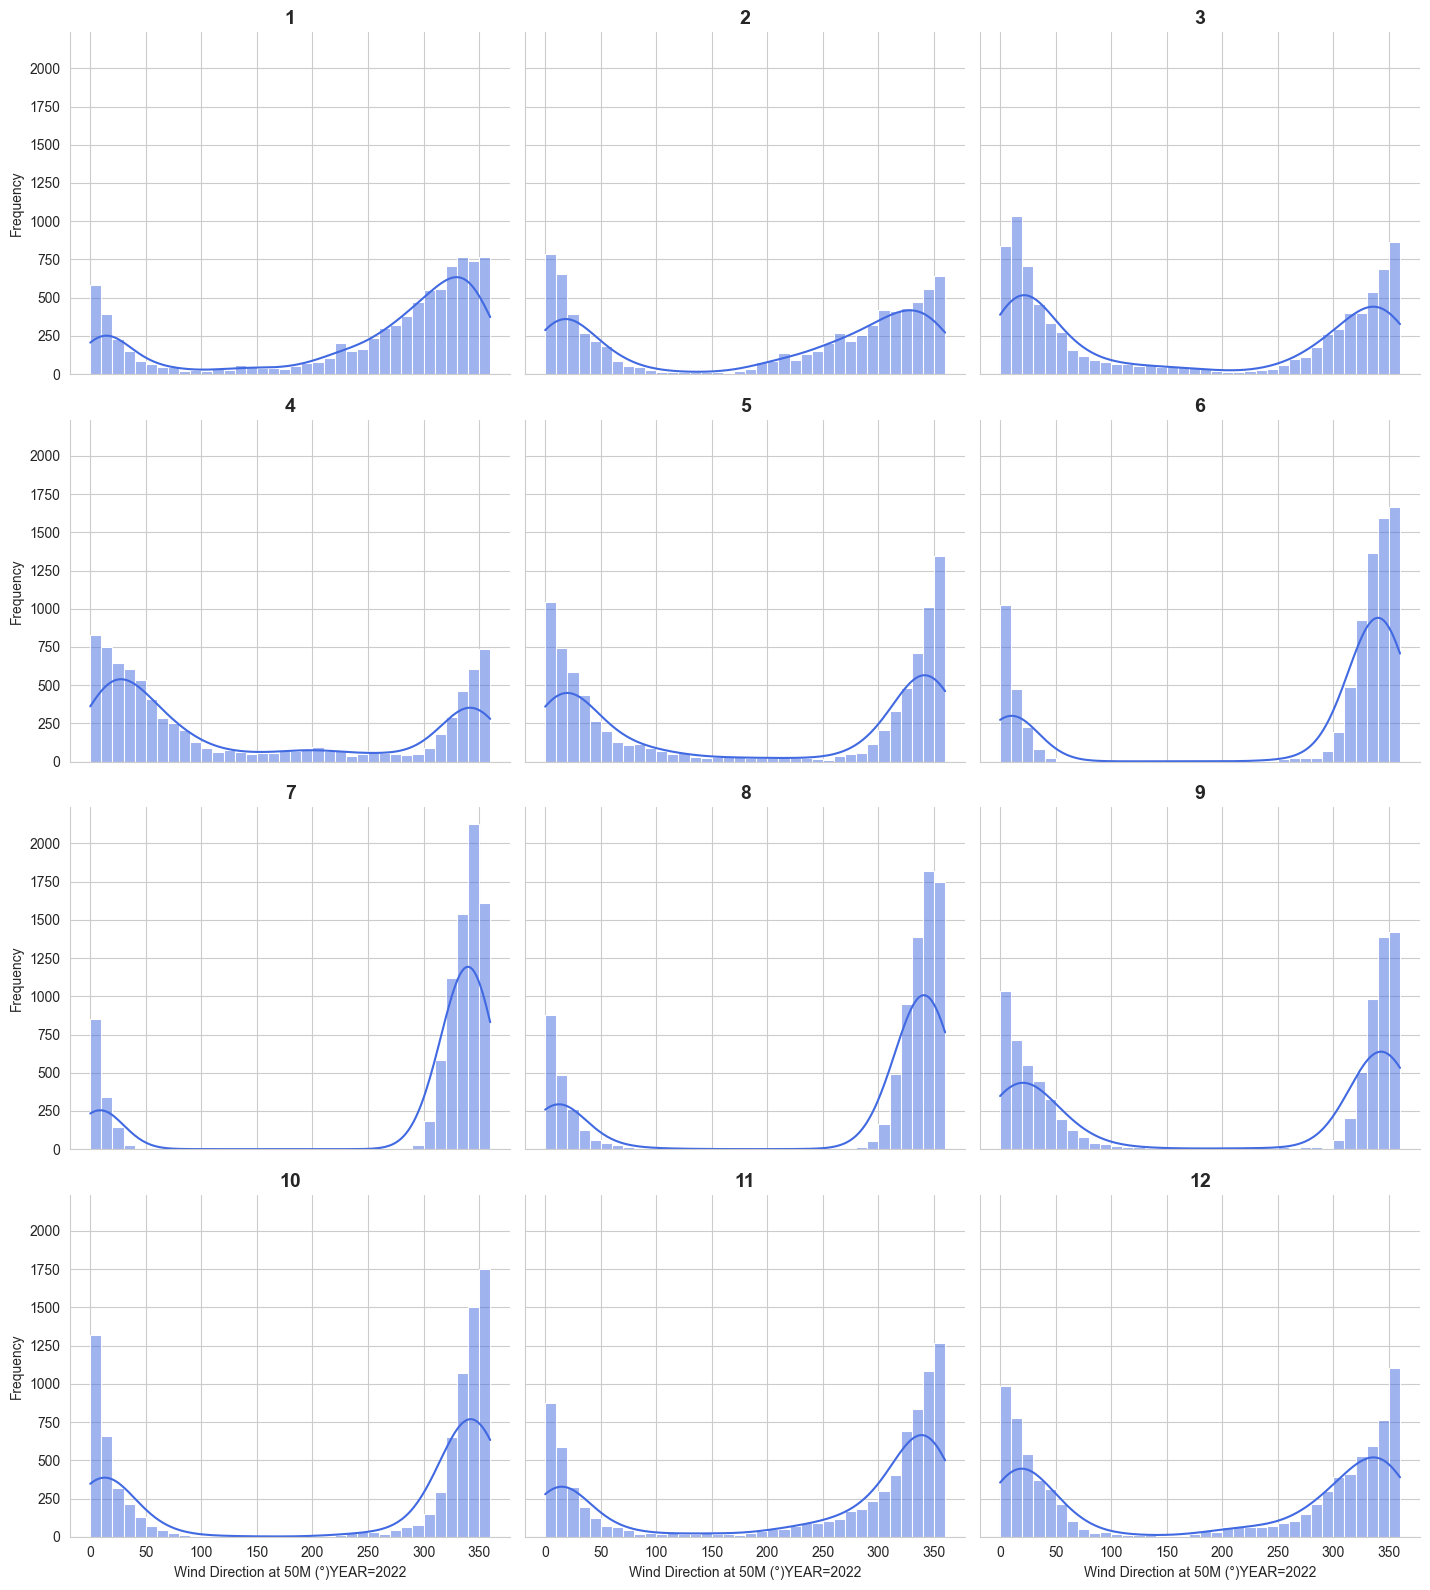

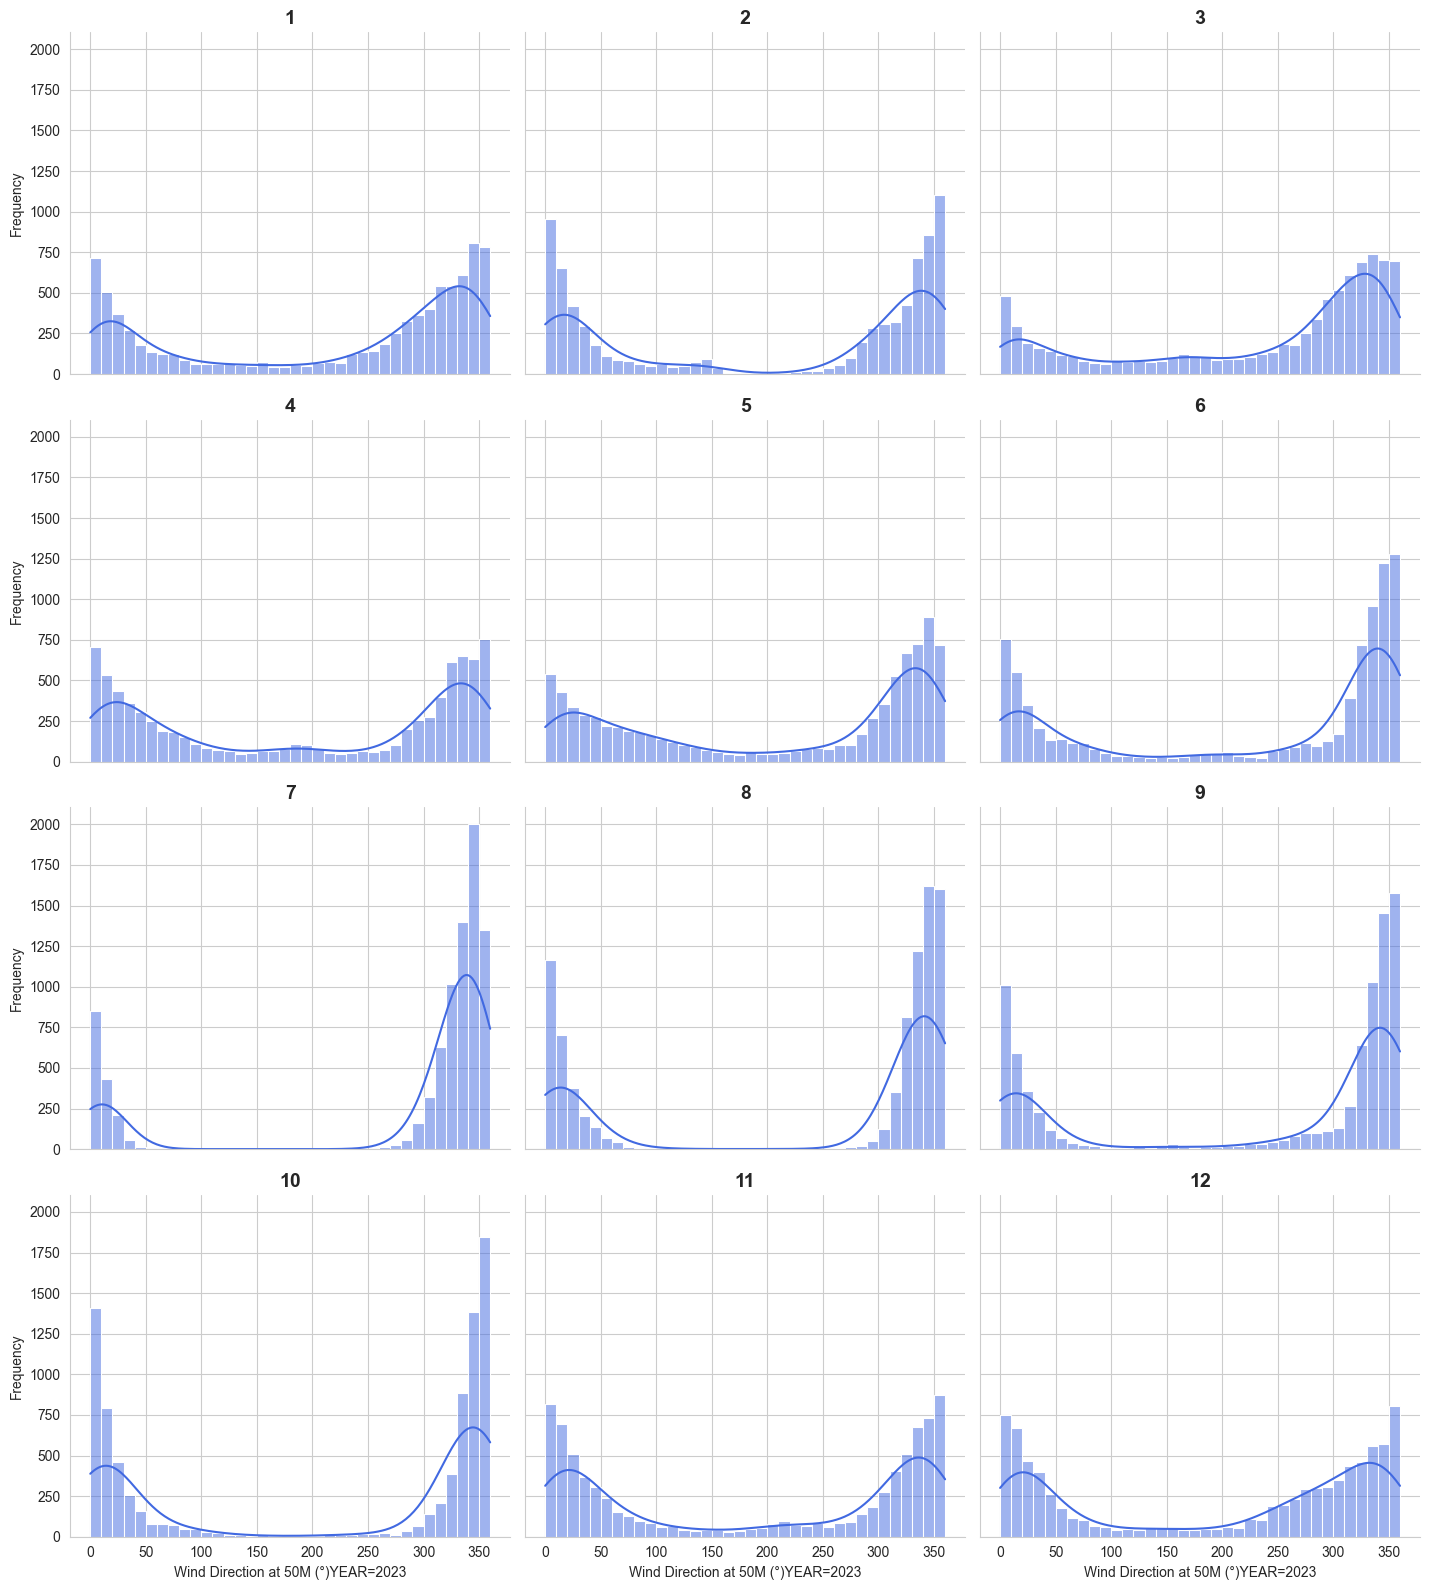

In [8]:
for YEAR in df["YEAR"].unique():
    dff=df[df["YEAR"]==YEAR]
    # Set a modern style
    sns.set_style("whitegrid")

    # Create FacetGrid with better spacing and aesthetics
    g = sns.FacetGrid(dff, col="Month", col_wrap=3, height=4, aspect=1.2, sharex=True, sharey=True)

    # Map the histplot correctly
    g.map_dataframe(sns.histplot, x="WD50M", binwidth=10, kde=True, color="royalblue")

    # Improve labels and formatting
    g.set_axis_labels(f"Wind Direction at 50M (°)YEAR={YEAR}", "Frequency")
    g.set_titles(col_template="{col_name}", size=14, fontweight="bold")
    #g.title(f"Wind Direction at 50M (°)YEAR={YEAR}")
    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"resources/Wind_DIRS_Histo_50M_year{YEAR}.jpg", dpi=300, bbox_inches="tight")
    plt.show()
